In [1]:
import numpy as np
from maxvolpy.maxvol import maxvol
from numpy.polynomial import Chebyshev as T
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.linalg import lu as lu
from gen_1D import *
%matplotlib inline

In [7]:
# this function approximates set of points (arr, rhs) with linear combination of either Chebyshev polynomials or monomials
'''
Input:
x – all the points
f – right hand side values f(x)
basis = ('cheb', 'poly') – basis functions
degree – highest degree of appr polynomial
grid type = ('unif', 'cheb', 'maxvol') 
dom – interval of x
'''
def approx(arr, rhs, degree, grid, dom):
    num_of_points = degree + 1
    
    A = Gen_1D(num_of_points, arr, debug = True)
    
    
    # grid        
    row_indx, _ = maxvol(A)
    #row_indx = np.sort(row_indx)
    
    # solution 
    c = np.linalg.solve(A[row_indx], rhs[row_indx])
    f_appr = np.polynomial.chebyshev.chebval(arr, c)  
    
    print(arr.shape, f_appr.shape, rhs.shape, row_indx.shape)

    row_indx_deriv = []
    row_indx_func = []
    
    for i in range(row_indx.shape[0]):   
        if row_indx[i] >= len(arr):
            row_indx_deriv.append(row_indx[i]) 
        else:
            row_indx_func.append(row_indx[i])    
    row_indx_deriv =  np.array(row_indx_deriv, dtype=int)
    row_indx_func = np.array(row_indx_func, dtype=int)
    # mapping 'doubled' indices on the linear space array
    a = ((row_indx_deriv - len(arr))) 
    
    # auxiliary array for visualising derivative point distribution
    unit = np.ones(row_indx_deriv.shape[0], dtype = int)
    print(row_indx_func, row_indx_deriv)
    
    plt.plot(arr, rhs[:len(x)], 'b', arr, f_appr, 'r--', arr[a], unit, 'go', arr[row_indx_func], rhs[row_indx_func], 'yo')
    plt.grid()
    plt.title(grid)
    plt.show()
        
    # error
    print('Error_' + grid + ' = ', la.norm(rhs[:len(x)] - f_appr, 2) / la.norm(rhs[:len(x)], 2))
    print

number of points(l) = 100,  number of monoms(n_size) = 9
((100,), (100,), (200,), (9,))
(array([99]), array([143, 100, 199, 121, 181, 108, 164, 194]))


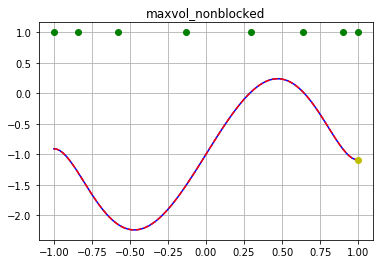

('Error_maxvol_nonblocked = ', 1.1008737019957429e-05)



In [8]:
# let's test our approx function here
n = 100     # number of sampling points   
deg = 8  # degree of polynomial          
interval = [-1, 1]  # interval of x
x = np.linspace(interval[0], interval[1], n, dtype=np.float64) 
f = np.zeros(2*len(x), dtype=np.float64)

for cou in np.arange(0, len(x)):
    f[cou] = 2*x[cou]**7 - 5*x[cou]**3 + 2*x[cou] - 1 + np.sin(2*x[cou])
    f[cou + len(x)] = 14*x[cou]**6 - 15*x[cou]**2 + 2 + 2*np.cos(2*x[cou])
    #f[cou] = 1/(x[cou/2]**2 + 1
    #f[cou+1] = -2*x[cou/2]/((x[cou/2]**2 + 1)**2)
    #f[cou] = np.exp(-x[cou/2])*(np.sin(x[cou/2]))**2
    #f[cou + 1] = np.exp(-x[cou/2])*np.sin(x[cou/2])*(2*np.cos(x[cou/2]) - np.sin(x[cou/2]))
    
approx(x, f, degree = deg, grid = 'maxvol_nonblocked', dom = interval)

In [ ]:
A = Gen_1D(deg+1, x, debug=True)

p,l,u = lu(A)
print (u)